In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Principal Component Analysis

In this notebook we will examine the method of Principal Component Analysis (PCA), which can be used to project data onto lower-dimensional spaces while maximizing the variance of the projections. PCA works by projecting the data onto the subspace spanned by the eigenvectors of the covariance matrix associated with the largest eigenvalues.

We begin our example by generating a synthetic two-dimensional data set that is normally distributed with mean $\boldsymbol{\mu}$ and covariance $\mathbf{\Sigma}$.

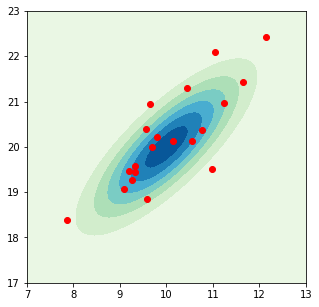

In [2]:
# Set the parameters of the distribution
mu = np.array([10, 20])
sigma = np.array([[1, 0.8], [0.8, 1]])

# Sample the distribution
data = np.random.multivariate_normal(mu, sigma, 20)

# Visualize it
N = 100
normal_dist = multivariate_normal(mu, sigma)
x1 = np.linspace(7, 13, N)
x2 = np.linspace(17, 23, N)
X = np.dstack(np.meshgrid(x1, x2))
plt.figure(figsize=(5,5))
plt.contourf(x1, x2, normal_dist.pdf(X), cmap="GnBu")
plt.scatter(data[:, 0], data[:, 1], color="r");

Note that above we have directly defined the mean and covariance matrix for the distribution. In a practical application, only the data set is given and we have to estimate the mean and covariance from it. Let's do that.

In [3]:
mean = np.mean(data, axis=0)
covariance = np.cov(data.T)

The direction of maximum variance is given by the eigenvectors of the covariance matrix that correspond to the largest eigenvalues.

In [4]:
lambdas, eigvectors = np.linalg.eig(covariance)
# The first principal component
u_p = eigvectors[:, np.argmax(lambdas)]

Here we have denoted $\mathbf{u}_p$ as the principal component with the largest eigenvalue. We can now plot a line parallel to this vector that passes through the mean of the points, by obtaining the equation of the line after extracting the slope from the vector and the intercept from the mean through which the line must pass. This is not so relevant for PCA but for visualization purposes it is useful.

Additionally, we can visualize the projections of the data on the line. The projection of $\mathbf{x}$ onto $\mathbf{u}_p$ is $\mathbf{u}_p\mathbf{u}_p^T\mathbf{x}$ (note that the inner product $\mathbf{u}_p^T\mathbf{x}$ is a scalar and corresponds to the component of $\mathbf{x}$ along $\mathbf{u}_p$). If we want to show the projections on the line that passes through the mean $\mathbf{m}$, then we must subtract it from the points first, so finally, the point projected onto the line is $\mathbf{m} + \mathbf{u}_p\mathbf{u}_p^T(\mathbf{x}-\mathbf{m})$. The actual projection on the subspace is simpler though, being given by $\mathbf{u}_p^T\mathbf{x}$ which in this case results in a scalar.

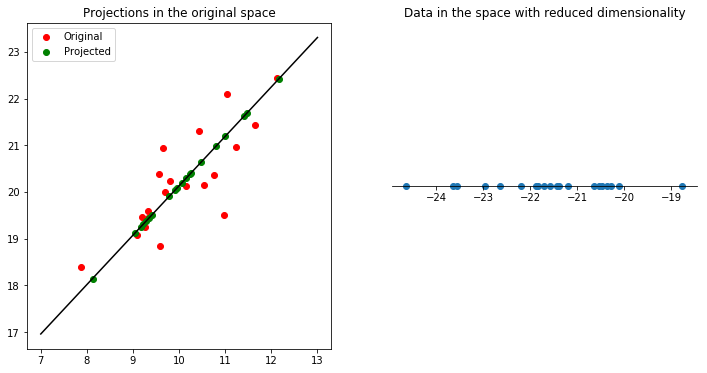

In [5]:
# Use the equation of a line to obtain a line parallel to u_p that passes through the mean
slope = u_p[1]/u_p[0]
x = np.linspace(7, 13, 100)
y = slope*(x-mean[0]) + mean[1]

# Compute the projection on the line
proj = mean + (np.outer(u_p, u_p) @ (data-mean).T).T

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
axes[0].plot(x, y, 'k')
axes[0].scatter(data[:, 0], data[:, 1], color='r', label='Original')
axes[0].scatter(proj[:, 0], proj[:, 1], color='g', label='Projected')
axes[0].set_title('Projections in the original space')
axes[0].legend()

# The actual projection is simpler and lies on a space
# of lower dimension
reduced = u_p @ data.T
y_red = np.array([0] * len(reduced))
axes[1].scatter(reduced, y_red)
axes[1].yaxis.set_visible(False)
axes[1].spines['right'].set_color('none')
axes[1].spines['left'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].xaxis.set_ticks_position('bottom')
axes[1].spines['bottom'].set_position(('data',0))
axes[1].set_title("Data in the space with reduced dimensionality");

This visualization lets us observe how PCA projects the data onto the direction of maximum variance. The data is projected onto a subspace such that the projection has maximum variance, so that the points are spread apart, which is why PCA can be useful as a dimensionality reduction technique.